Importing Pakcages

In [ ]:
#!pip install unidecode
#!pip install yfinance

# importing packages
import numpy as np
import pandas as pd
from datetime import datetime
import requests
from bs4 import BeautifulSoup
from datetime import date
from datetime import timedelta
from unidecode import unidecode
from google.colab import drive
import re
import html
#from google.colab import drive
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import random

# 1.Scan/Parse/Scrape News Website

Mounting Google Drive for IO Files

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Setting Cut-off Date

In [ ]:
#Getting today's date
today = date.today()

#subtract 14 days from today
news_cutoff_date=datetime.today() - timedelta(days=14)

Data Cleaning

In [ ]:
#Defining Data cleaning methods

def unescape(x):
    return html.unescape(x)

def deleteHtmlTags(x):
    return BeautifulSoup(x, "lxml").text

def cleanData(X):
    X = deleteHtmlTags(X)
    X = unidecode(X)
    X = unescape(X)
   
    return X

Getting News Content

In [ ]:
#Method for getting news content from HTML webpage
def get_news_content(news_url):
  page = requests.get(news_url)
  soup = BeautifulSoup(page.content, "html.parser")
  for ele in soup.select('section[class*="release-body container"]'):
    job_element=ele
    break;
  try:
    return job_element.text
  except Exception as inst:
    return "Content Not Found"

Getting News URL, Heading, and News Time

In [ ]:
# Fetching news based on page number and page size from prnewswire.com
def get_all_news(pagesize, pagenumber):
  page_url ="https://www.prnewswire.com/news-releases/news-releases-list/?page="+str(pagenumber)+"&pagesize="+str(pagesize)
  print(page_url)
  page = requests.get(page_url)
  data = pd.DataFrame([])
  soup = BeautifulSoup(page.content, "html.parser")
  job_elements = soup.find_all("div", class_="row arabiclistingcards")
  data = pd.DataFrame([])
  loop_break=False

  # Finding news content on based on html tag like a, small, p and creating the dataframe
  for job_element in job_elements:
      news_url = job_element.find("a", class_="newsreleaseconsolidatelink display-outline")
      news_time = job_element.find("small")
      paragraph = job_element.find("p", class_="remove-outline")
      news_content=get_news_content('https://www.prnewswire.com'+news_url["href"])
      news_content=cleanData(news_content)
      news_content=news_content.replace('\n', '')
      data = data.append(pd.DataFrame({'news_url': news_url["href"], 'news_time': news_time,'news_content':news_content}, index=[0]),  ignore_index=True)
      
      if(len(news_time)>12):
        if(news_time[0:12]==news_cutoff_date):
          loop_break=True;
          print("Breaking", news_time)
          break;
      
  return data, loop_break

Start Scrapping and Saving Data in File

In [ ]:
#Start Scrapping(Execution Time:70 mins on Google Colab when 100 pages scrapped(100*100 records created))
df_news = pd.DataFrame([])
for x in range(1,500):
  print("Page:",x)
  df,loop_break=get_all_news(100, x)
  df_news = pd.concat( [df_news, df],axis=0,ignore_index=True)
  if(loop_break):
    break

#Saving data to JSON File
#data.to_csv('AI100_output.csv') 
df_news.to_json('/content/drive/My Drive/AI100_output.json')

Page: 1
https://www.prnewswire.com/news-releases/news-releases-list/?page=1&pagesize=100
Page: 2
https://www.prnewswire.com/news-releases/news-releases-list/?page=2&pagesize=100
Page: 3
https://www.prnewswire.com/news-releases/news-releases-list/?page=3&pagesize=100
Page: 4
https://www.prnewswire.com/news-releases/news-releases-list/?page=4&pagesize=100
Page: 5
https://www.prnewswire.com/news-releases/news-releases-list/?page=5&pagesize=100
Page: 6
https://www.prnewswire.com/news-releases/news-releases-list/?page=6&pagesize=100
Page: 7
https://www.prnewswire.com/news-releases/news-releases-list/?page=7&pagesize=100
Page: 8
https://www.prnewswire.com/news-releases/news-releases-list/?page=8&pagesize=100
Page: 9
https://www.prnewswire.com/news-releases/news-releases-list/?page=9&pagesize=100
Page: 10
https://www.prnewswire.com/news-releases/news-releases-list/?page=10&pagesize=100
Page: 11
https://www.prnewswire.com/news-releases/news-releases-list/?page=11&pagesize=100
Page: 12
https://

JSON file Sanity check

In [ ]:
#Checking JSON Format sanity
df_json = pd.read_json('AI100_output.json')
print(len(df_json))
df_json.to_json('/content/drive/My Drive/AI100_output.json')
if len(df_news)==  len(df_json):
  print('Both files have same data:',len(df_news),'records found')
else:
  print('Both files do not have same data: Original Scrapping Records: ',len(df_news),'while Read JSON Have:',len(df_json),'records')

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


10000
Both files have same data: 10000 records found


# 2.Track/Store/Search

a.	Keep track of the news by storing the parsed news

In [ ]:
#We are storing all news scrapping data in AI1100_output.json
df_json = pd.read_json('AI100_output.json')

In [ ]:
df_json.head(10)

,news_url,news_time,news_content
0,/news-releases/los-resultados-del-henley-passp...,2022-04-06 13:08:00,"LONDRES, 6 de abril de 2022 /PRNewswire/ -- Se..."
1,/news-releases/rosen-respected-investor-counse...,2022-04-06 13:06:00,"NEW YORK, April 6, 2022 /PRNewswire/ --WHY: Ro..."
2,/news-releases/six-omnia-partners-leaders-hono...,2022-04-06 13:03:00,"FRANKLIN, Tenn., April 6, 2022 /PRNewswire/ --..."
3,/news-releases/groups360-raises-35-million-in-...,2022-04-06 13:01:00,"$35 Million Investment from Zigg Capital, Blac..."
4,/news-releases/stamats-makes-new-audience-mana...,2022-04-06 13:01:00,"CEDAR RAPIDS, Iowa, April 6, 2022 /PRNewswire/..."
5,/news-releases/iran-prepaid-card-and-digital-w...,2022-04-06 13:00:00,"DUBLIN, April 6, 2022 /PRNewswire/ -- The ""Ira..."
6,/news-releases/permian-basin-royalty-trust-ann...,2022-04-06 13:00:00,"DALLAS, April 6, 2022 /PRNewswire/ -- Permian ..."
7,/news-releases/videobyte-partners-with-katz-di...,2022-04-06 13:00:00,"DENVER , April 6, 2022 /PRNewswire/ -- Katz Di..."
8,/news-releases/hyundai-teases-2023-palisade-wo...,2022-04-06 13:00:00,"NEW YORK, April 6, 2022 /PRNewswire/ -- Hyunda..."
9,/news-releases/campus-legends-partners-with-so...,2022-04-06 12:59:00,Tim Tebow-founded company becomes the only off...


b. Search For Stock Symbols in News Content

In [ ]:
# Loading an excel file that has all of the world's stock codes
yahoo_ticker_symbols_list = pd.read_excel(r"Yahoo_Ticker_Symbols_September_2017.xlsx", sheet_name = "Stock")

# Craeting a new dataframe with only ticker columns containing stock name with limit 10000
#ticker_symbols_list = yahoo_ticker_symbols_list['Ticker'].loc[:10000]
col_filter=yahoo_ticker_symbols_list['Category Name']=='Internet Information Providers'
ticker_symbols_list=yahoo_ticker_symbols_list[col_filter]['Ticker']

In [ ]:
# Using Regex to extract Stock Codes from a dataframe including website articles

# Empty list for stock codes
actual_ticker_symbols = []

# Creating a blank list that will be used to hold stock symbols.
ticker_symbols = []

# For loop to go through each entry in dataframe
for i in range(len(df_json)):
    # storing the words directly into our list
    #ticker_symbols = ticker_symbols + re.findall(r'\b[A-Z]{2,}\b', df.iloc[i]['title']) 
    ticker_symbols = ticker_symbols + re.findall(r'\b[A-Z]{2,}\b', df_json.iloc[i]['news_content'])
   
# Converting into Set and Removing duplicates
ticker_symbols = list(set(ticker_symbols))

# printing to check the stock symbols
print('Stock symbols : ', ticker_symbols)

Stock symbols :  ['TFE', 'RIV', 'MFT', 'WHATS', 'STUDIOS', 'BUCKLE', 'CRDMO', 'GOJO', 'TASMU', 'ACRX', 'NRGD', 'BRAMBLE', 'WILKINSON', 'SGBD', 'DKG', 'NLR', 'PUP', 'UNSPON', 'UKAFPA', 'THRIVE', 'DUGOUT', 'TFDA', 'PROTAC', 'MINING', 'RHI', 'IMD', 'NPR', 'ABC', 'PLNT', 'RD', 'SN', 'ZGS', 'ARA', 'MGC', 'SBYJU', 'ALC', 'TEDX', 'ARCADIA', 'CVCCVC', 'CARU', 'SPHERESPHERE', 'MAGIC', 'FCCA', 'POUCH', 'RIDGE', 'HERELISTEN', 'NETS', 'ANB', 'SCACA', 'ARVADA', 'ISTDP', 'CALGARY', 'GRACE', 'SPRB', 'BOWLS', 'SCHOOL', 'HELPING', 'VLT', 'GRANDS', 'WARC', 'XPRIZE', 'CLUB', 'DVR', 'IFS', 'FTL', 'MATERIAL', 'LYV', 'TPI', 'HUNT', 'CONIFER', 'LGBTI', 'ISGVALUE', 'GT', 'TOWNSHIP', 'SGC', 'AAC', 'DEP', 'ENTREPRISE', 'RAA', 'GRAFIXGRAFIX', 'CYG', 'NOVEL', 'LANZA', 'MORE', 'LURE', 'CATHARINES', 'NOVAMEDTEK', 'WONDER', 'LSU', 'GDYN', 'LONGBOAT', 'NEGRO', 'TINT', 'MEDLINE', 'AP', 'BACK', 'SHS', 'KOH', 'VIOMI', 'VIM', 'APUS', 'ZIPIMX', 'BOTTLE', 'PLANT', 'POMPANO', 'LEADERSHIP', 'BSFL', 'PHARMACEUTICALS', 'NFB', 

In [ ]:
# Getting rid of the words which are not in stock symbols

# Looping through all value
for ticker in ticker_symbols:
    if ticker in ticker_symbols_list.values:
        actual_ticker_symbols.append(ticker) # if value matches then it is stored in new list

# Printing all the valid stock symbols
print('Validated Stock symbols from Yahoo Stock symbols document:', actual_ticker_symbols) 

Validated Stock symbols from Yahoo Stock symbols document: ['TWTR', 'TZOO', 'TRIP', 'JD', 'BIDU', 'ATHM', 'AKAM', 'GOOG', 'SOHU', 'ZG', 'RATE', 'FB', 'CRCM', 'WIX', 'MEET', 'IAC', 'MARK', 'WEB', 'WB', 'GOOGL']


In [ ]:
stocks_list=random.choices(actual_ticker_symbols, k=3)
print(stocks_list)

['FB', 'TZOO', 'TWTR']


# 3.Retrieve Data From Yahoo Finance

Getting 180d History of Randomly Chosen Stocks

In [ ]:
#Downloading Stock history from yahoo finance
stocks_price_and_volume = dict()
df_180d=pd.DataFrame([])
for ticker in stocks_list:
    current_ticker_data= yf.download(tickers=ticker, period = '180d')
    df_temp=pd.DataFrame.from_dict(current_ticker_data)
    #print(df_temp)
    df_temp['Stock']=ticker
    
    df_180d=df_180d.append(df_temp)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_180d.head(5)

,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
2021-07-28,374.559998,377.549988,366.929993,373.279999,373.279999,29676900,FB
2021-07-29,361.000000,365.519989,356.739990,358.320007,358.320007,33413200,FB
2021-07-30,354.000000,360.730011,352.940002,356.299988,356.299988,15976200,FB
2021-08-02,358.100006,359.399994,350.739990,351.950012,351.950012,13180400,FB
2021-08-03,352.730011,353.769989,347.700012,351.239990,351.239990,12406100,FB


# 4.Visualize

a.	Prepare colourful visualization/graphs showing stock prices for last 180 days (6 months).
Visualization should be a plot (time - series) for:
1.	Volume
2.	Daily Close Price


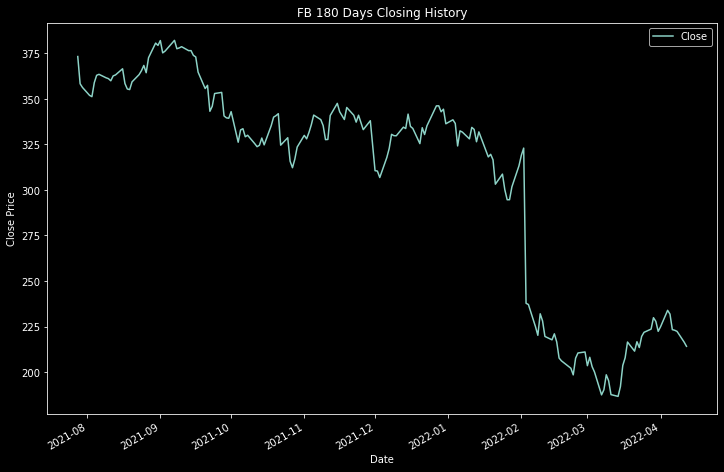

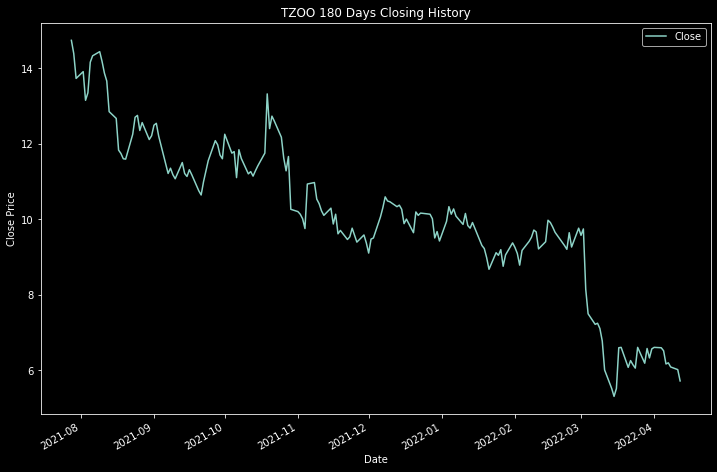

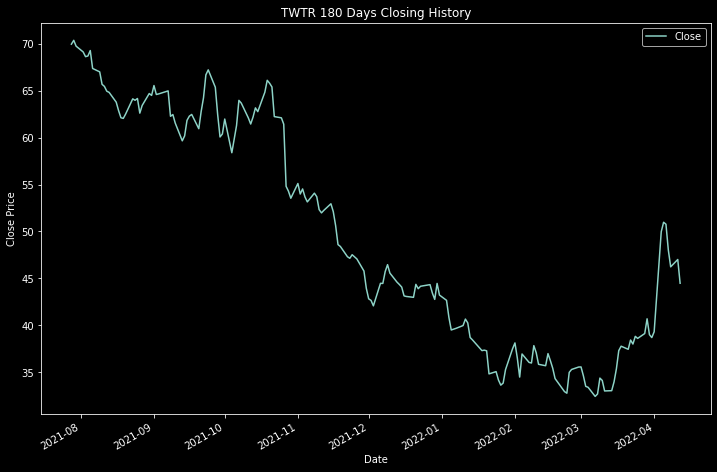

In [ ]:
#Visualisation for Daily Close Price
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
for ticker in stocks_list:
    df_stock_temp=pd.DataFrame([])
    df_stock=pd.DataFrame([])
    df_stock_temp= df_180d[df_180d['Stock']==ticker]
    #df_stock['Date']=df_stock_temp['Date']
    df_stock['Stock']=df_stock_temp['Stock']
    df_stock['Close']=df_stock_temp['Close']
    df_stock.plot()
    plt.title(ticker+" 180 Days Closing History")
    plt.xlabel('Date')
    plt.ylabel("Close Price")
    plt.show()

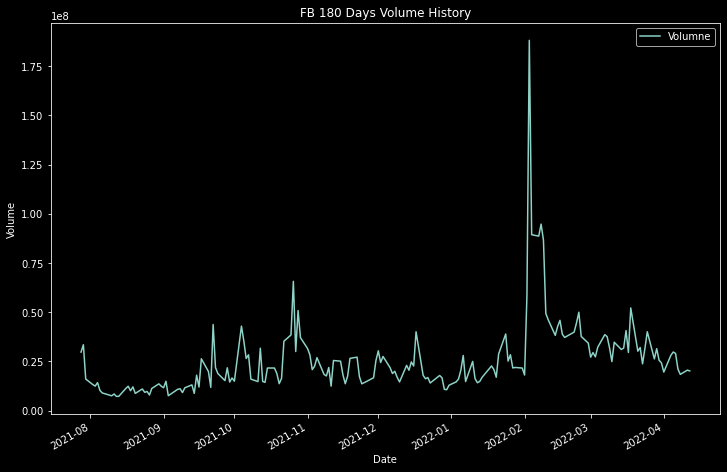

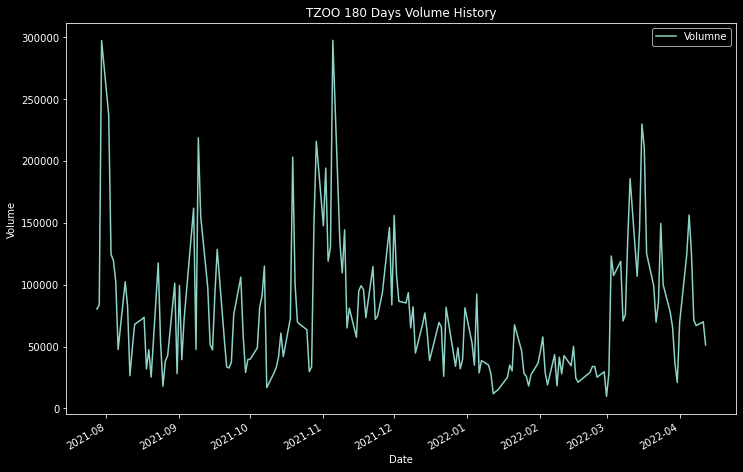

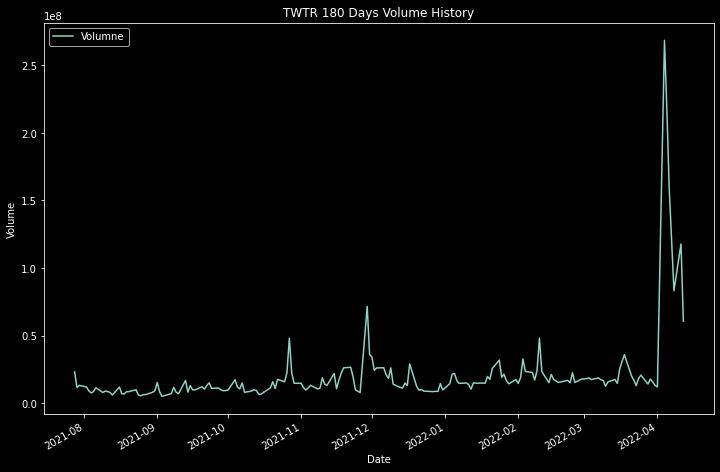

In [ ]:
#Visualisation for Daily Volume
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
for ticker in stocks_list:
    df_stock_temp=pd.DataFrame([])
    df_stock=pd.DataFrame([])
    df_stock_temp= df_180d[df_180d['Stock']==ticker]
    #df_stock['Date']=df_stock_temp['Date']
    df_stock['Stock']=df_stock_temp['Stock']
    df_stock['Volumne']=df_stock_temp['Volume']
    df_stock.plot()
    plt.title(ticker+" 180 Days Volume History")
    plt.xlabel('Date')
    plt.ylabel("Volume")
    plt.show()

# Optional Code: Stock Trending

In [ ]:
#Trending System
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

#defining trendline
#Polyfit: Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
#Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

# Checking and Visualizing the trend of stock based on slope stagnations.
def check_stock_trend(stock_symbol):
    stocks_price_and_volume = dict()
    stocks=[stock_symbol]
    df_stock=pd.DataFrame([])
    for ticker in stocks:
        current_ticker_data= yf.download(tickers=ticker, period = '180d')
        df_temp=pd.DataFrame.from_dict(current_ticker_data)
        df_temp['Stock']=ticker
        df_stock=df_stock.append(df_temp)
        
        
    df_closed=df_stock['Close']
    df_closed=df_closed.reset_index(drop=False)
    slope = trendline(df_closed['Close'])
    if slope>-0.33 and slope<0.33:
        print("Trending Slope Stagnation:",slope,". WAIT BEFORE BUYING STOCK!")
    if slope<=-0.33:
        print("Trending Slope Downward:",slope,". DO NOT BUY STOCK!")
    df_closed=df_stock['Close']
    if slope>=0.33:
        print("Trending Slope Upward:",slope,". BUY STOCK!")
    decomposition=sm.tsa.seasonal_decompose(df_closed, model='additive',freq=30)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    df_closed.plot()
    trend.plot()
    
    matplotlib.rcParams['figure.figsize']=[9.0,5.0]
    

[*********************100%***********************]  1 of 1 completed
Trending Slope Upward: 0.33561499002903455 . BUY STOCK!


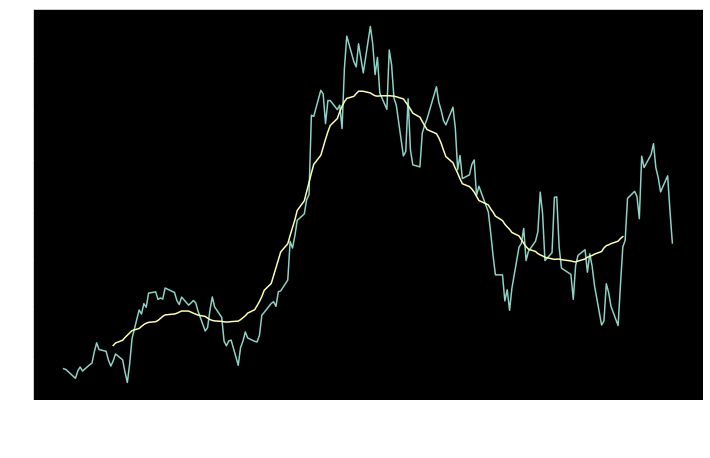

In [ ]:
check_stock_trend('NVDA')